# Predicting the Parkinson's Disease using Machine Learning

# Importing all the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# # to make the plot appear inside the notebook
# %matplotlib inline 

In [2]:
df = pd.read_csv("Parkinsson_disease.csv")


In [3]:
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [4]:
df.tail()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[5 rows x 24 columns]

In [5]:
df = df.drop(columns=['name'])

In [6]:
df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

In [7]:
df.shape

(195, 23)

In [8]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [9]:
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

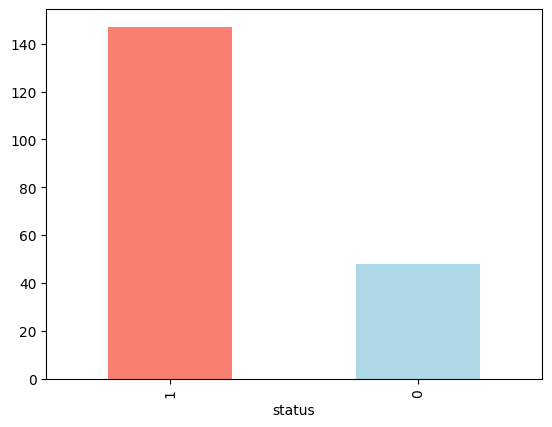

In [11]:
df["status"].value_counts().plot(kind="bar",color=("salmon","lightblue"));

In [12]:
pd.crosstab(df['status'], df['MDVP:Fo(Hz)'])

MDVP:Fo(Hz)  88.333   91.904   95.056   95.385   95.605   95.730   96.106   \
status                                                                       
0                  0        0        0        0        0        0        0   
1                  1        1        1        1        1        1        1   

MDVP:Fo(Hz)  98.804   100.770  100.960  ...  237.226  237.323  240.301  \
status                                  ...                              
0                  0        0        0  ...        1        1        1   
1                  1        1        1  ...        0        0        0   

MDVP:Fo(Hz)  241.404  242.852  243.439  244.990  245.510  252.455  260.105  
status                                                                      
0                  1        1        1        1        1        1        1  
1                  0        0        0        0        0        0        0  

[2 rows x 195 columns]

In [13]:
pd.crosstab(df['status'], df['MDVP:Fhi(Hz)'])

MDVP:Fhi(Hz)  102.145  102.305  107.715  108.664  110.019  112.240  112.777  \
status                                                                        
0                   0        0        0        0        0        0        0   
1                   1        1        1        1        1        1        1   

MDVP:Fhi(Hz)  113.597  113.840  115.697  ...  442.557  442.824  450.247  \
status                                   ...                              
0                   1        0        0  ...        0        0        0   
1                   0        1        1  ...        1        1        1   

MDVP:Fhi(Hz)  479.697  492.892  565.740  581.289  586.567  588.518  592.030  
status                                                                       
0                   0        0        0        1        0        0        1  
1                   1        1        1        0        1        1        0  

[2 rows x 195 columns]

In [14]:
pd.crosstab(df['status'], df['MDVP:Jitter(%)'])

MDVP:Jitter(%)  0.00168  0.00174  0.00178  0.00180  0.00183  0.00185  0.00198  \
status                                                                          
0                     0        0        1        1        0        1        1   
1                     1        1        0        0        1        0        0   

MDVP:Jitter(%)  0.00205  0.00210  0.00212  ...  0.01568  0.01627  0.01719  \
status                                     ...                              
0                     1        1        1  ...        0        0        0   
1                     0        0        0  ...        1        1        1   

MDVP:Jitter(%)  0.01813  0.01872  0.01936  0.02714  0.03011  0.03107  0.03316  
status                                                                         
0                     0        0        0        0        0        0        0  
1                     1        1        1        1        1        1        1  

[2 rows x 173 columns]

# scatter plot

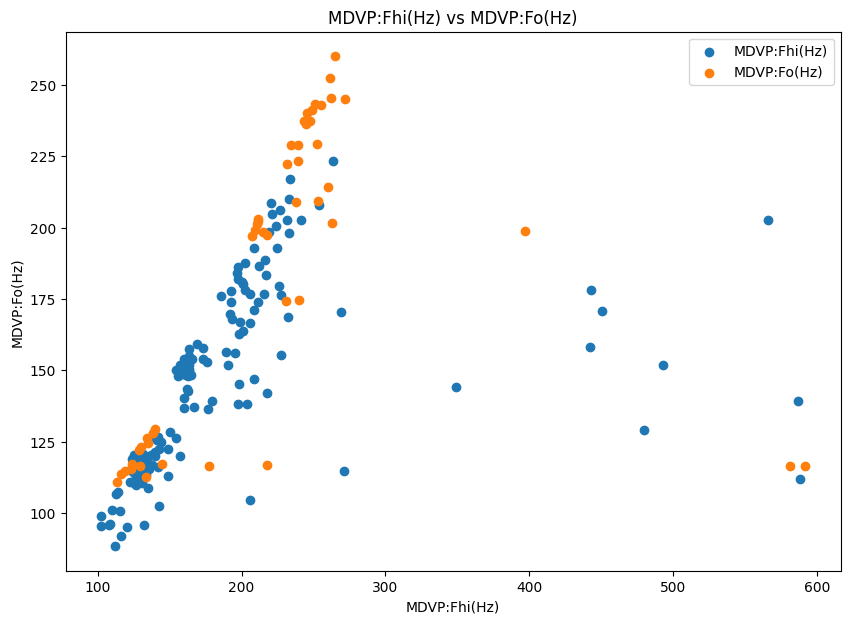

In [15]:
plt.figure(figsize=(10,7))

# Scatter with positive examples
plt.scatter(df["MDVP:Fhi(Hz)"][df.status==1],
            df['MDVP:Fo(Hz)'][df.status==1])

plt.scatter(df["MDVP:Fhi(Hz)"][df.status==0],
            df['MDVP:Fo(Hz)'][df.status==0])

plt.title("MDVP:Fhi(Hz) vs MDVP:Fo(Hz)")
plt.xlabel("MDVP:Fhi(Hz)")
plt.ylabel("MDVP:Fo(Hz)")
plt.legend(['MDVP:Fhi(Hz)','MDVP:Fo(Hz)']);

# Plotting the correlation metrix

In [16]:
df["status"] = df["status"].astype('float64')

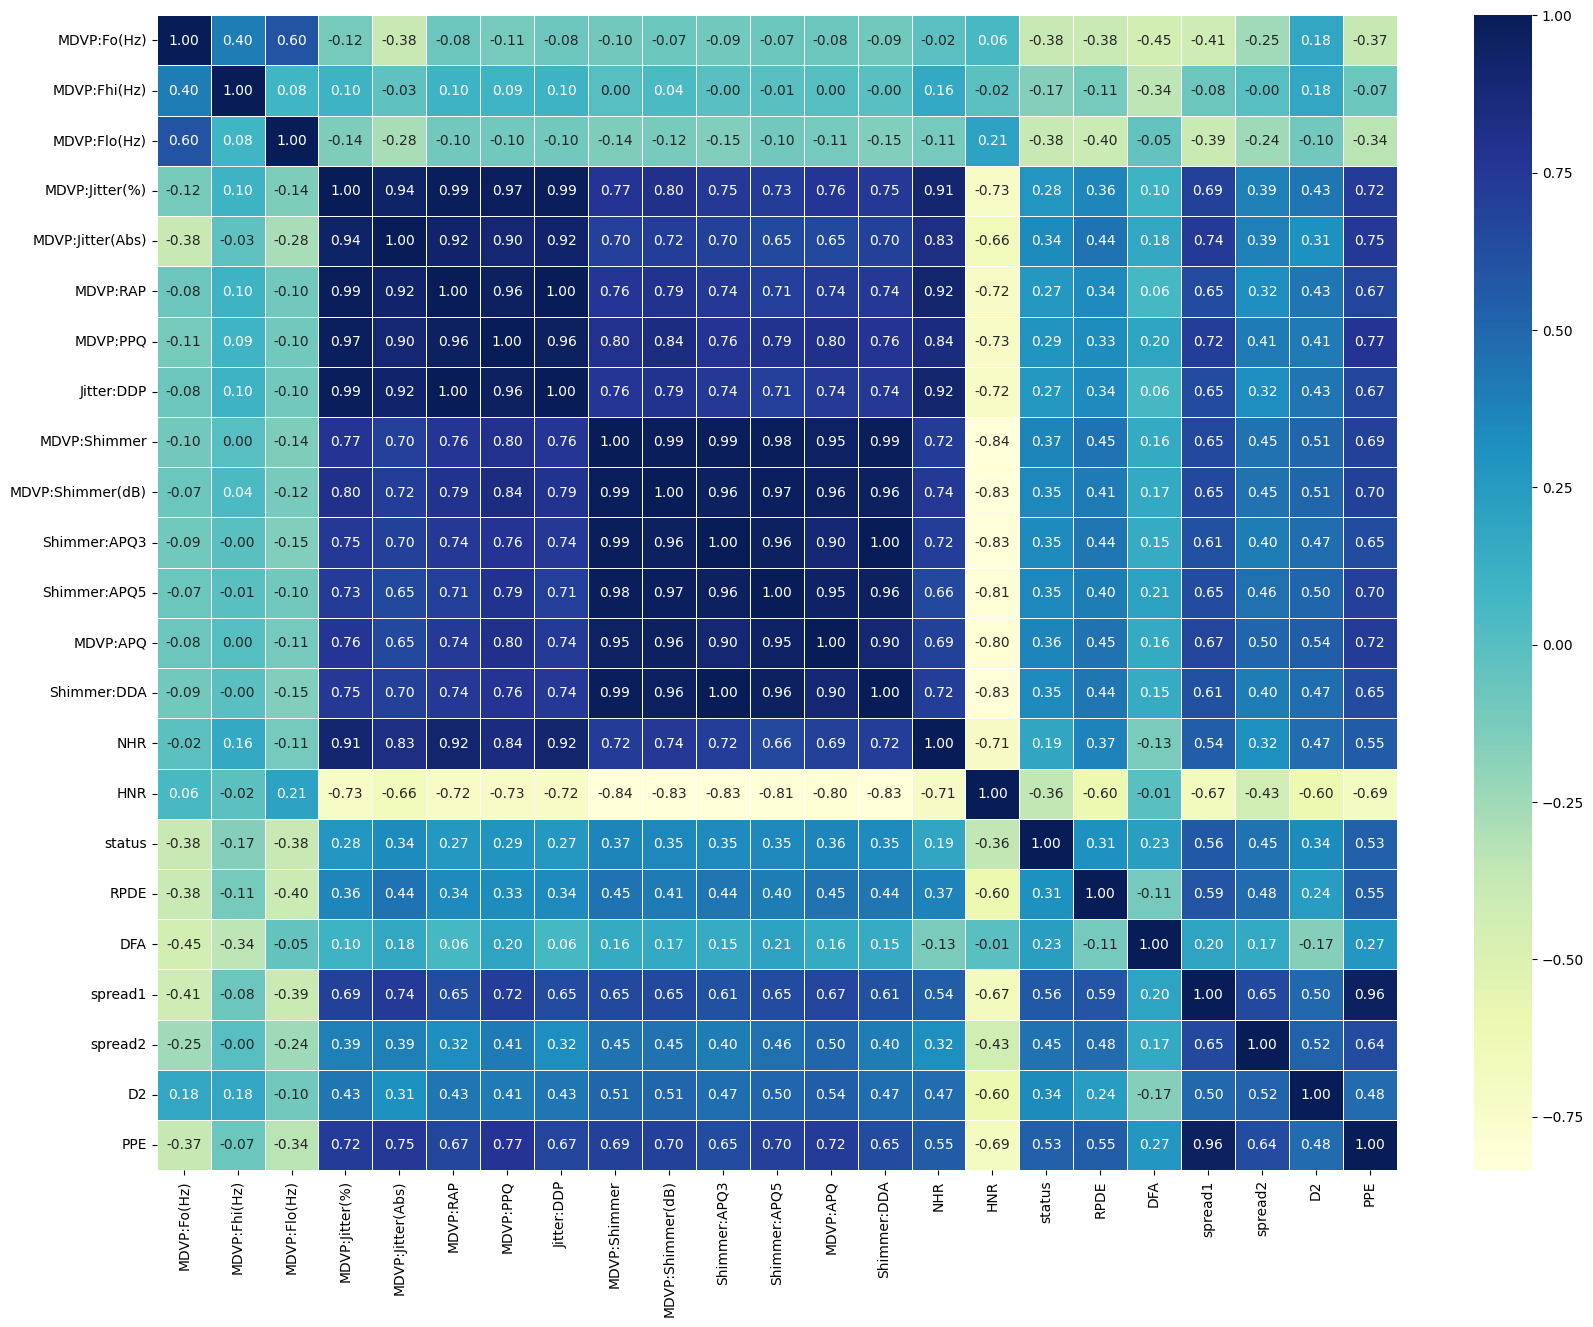

In [17]:
# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_metrix = numerical_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_metrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
plt.show()

In [18]:
df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033     1.0  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085     1.0  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651     1.0  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644     1.0  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649     1.0  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

# Creating a Machine Learning Model

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make plots appear inside the notebook
%matplotlib inline 

#import models form sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve

In [20]:
np.random.seed(42)

In [21]:
x = df.drop("status",axis = 1)
y = df["status"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [23]:
x_train.shape

(156, 22)

In [24]:
x_test.shape

(39, 22)

In [25]:
y_train.shape

(156,)

In [26]:
y_test.shape

(39,)

In [27]:
!pip install xgboost

In [28]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor


In [29]:
models = {"Logistic Regression" : LogisticRegression(),
         "K Neighbours" : KNeighborsClassifier(),
         "Random Forest Classifier" : RandomForestClassifier(),
         "Support Vector Machines" : SVC(),
         "AdaBoost Classifier" : AdaBoostClassifier()}

### Creating a function to fit the model

In [30]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    # Make a dictionary to store the model scores
    model_scores={}
    # 
    for name,model in models.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and store it to the model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [31]:
model_score = fit_and_score(models,
                           x_train,
                           x_test,
                           y_train,
                           y_test)

model_score

/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Logistic Regression': 0.8974358974358975,
 'K Neighbours': 0.8205128205128205,
 'Random Forest Classifier': 0.9487179487179487,
 'Support Vector Machines': 0.8461538461538461,
 'AdaBoost Classifier': 0.8717948717948718}

In [32]:
import matplotlib.pyplot as plt

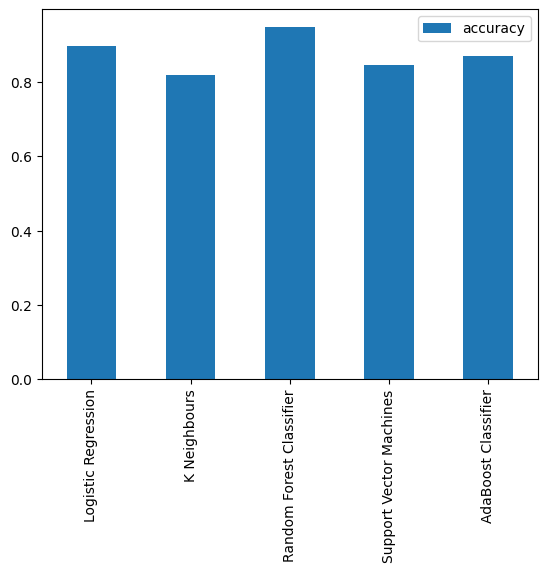

In [33]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

#### Let's tune Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
# Initialize lists to store scores
train_scores = []
test_scores = []

# Create a list of different values of regularisation parameter C
C_values = [0.01, 0.1, 1, 10, 100]

# Set up LogisticRegression instance
log_reg = LogisticRegression()

# Loop through different C values
for C in C_values:
    log_reg.set_params(C=C)
    
    # Fit the algorithm on the training data
    log_reg.fit(x_train, y_train)
    
    # Update the training score list
    train_scores.append(log_reg.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(log_reg.score(x_test, y_test))

/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [35]:
train_scores

[0.8333333333333334,
 0.8333333333333334,
 0.8525641025641025,
 0.8589743589743589,
 0.8589743589743589]

In [36]:
test_scores

[0.7948717948717948,
 0.8717948717948718,
 0.8974358974358975,
 0.8974358974358975,
 0.9230769230769231]

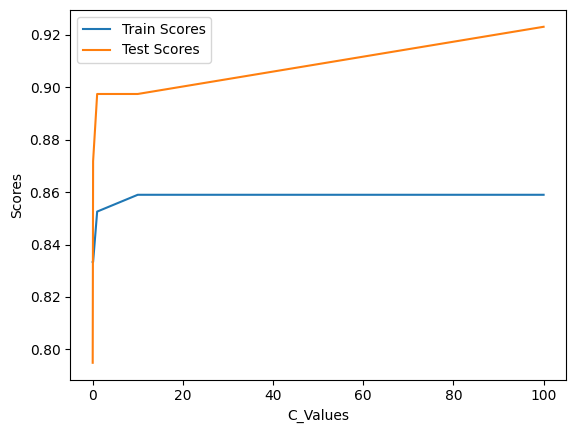

In [37]:
plt.plot(C_values, train_scores, label="Train Scores")
plt.plot(C_values, test_scores, label="Test Scores")
plt.ylabel("Scores")
plt.xlabel("C_Values")
plt.legend()
plt.show();

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize lists to store scores
train_scores_knn = []
test_scores_knn = []

# Create a list of different values of n_neighbors
neighbors = range(1, 21)

# Set up KNeighborsClassifier instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors values
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm on the training data
    knn.fit(x_train, y_train)
    
    # Update the training score list
    train_scores_knn.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores_knn.append(knn.score(x_test, y_test))

In [39]:
train_scores_knn

[1.0,
 0.9294871794871795,
 0.9294871794871795,
 0.8910256410256411,
 0.8974358974358975,
 0.8782051282051282,
 0.8974358974358975,
 0.8974358974358975,
 0.8846153846153846,
 0.8910256410256411,
 0.8846153846153846,
 0.8846153846153846,
 0.8269230769230769,
 0.8333333333333334,
 0.8269230769230769,
 0.8333333333333334,
 0.8076923076923077,
 0.7948717948717948,
 0.7948717948717948,
 0.7948717948717948]

In [40]:
test_scores_knn

[0.7948717948717948,
 0.7435897435897436,
 0.7948717948717948,
 0.7692307692307693,
 0.8205128205128205,
 0.7435897435897436,
 0.8205128205128205,
 0.7948717948717948,
 0.7948717948717948,
 0.7948717948717948,
 0.7692307692307693,
 0.7692307692307693,
 0.7948717948717948,
 0.7948717948717948,
 0.8205128205128205,
 0.7692307692307693,
 0.8205128205128205,
 0.7435897435897436,
 0.7692307692307693,
 0.717948717948718]

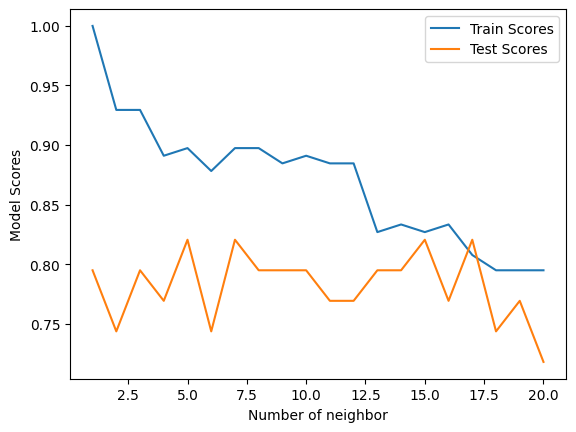

In [41]:
plt.plot(neighbors,train_scores_knn, label="Train Scores");
plt.plot(neighbors,test_scores_knn,label=("Test Scores"));
plt.xlabel("Number of neighbor");
plt.ylabel("Model Scores");
plt.legend();
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize lists to store scores
train_scores_rf = []
test_scores_rf = []

# Create a list of different values of n_estimators
n_estimators_range = range(1, 21)

# Set up RandomForestClassifier instance
rf = RandomForestClassifier()

# Loop through different n_estimators values
for n in n_estimators_range:
    rf.set_params(n_estimators=n)
    
    # Fit the algorithm on the training data
    rf.fit(x_train, y_train)
    
    # Update the training score list
    train_scores_rf.append(rf.score(x_train, y_train))
    
    # Update the test scores list
    test_scores_rf.append(rf.score(x_test, y_test))

In [43]:
train_scores_rf

[0.9102564102564102,
 0.9358974358974359,
 0.9807692307692307,
 0.9743589743589743,
 0.9807692307692307,
 1.0,
 0.9871794871794872,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9935897435897436,
 0.9935897435897436,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9935897435897436]

In [44]:
test_scores_rf

[0.8717948717948718,
 0.8205128205128205,
 0.8717948717948718,
 0.7948717948717948,
 0.9230769230769231,
 0.8205128205128205,
 0.9230769230769231,
 0.8717948717948718,
 0.9230769230769231,
 0.9230769230769231,
 0.9487179487179487,
 0.8974358974358975,
 0.9487179487179487,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9487179487179487,
 0.8974358974358975,
 0.9487179487179487,
 0.8974358974358975]

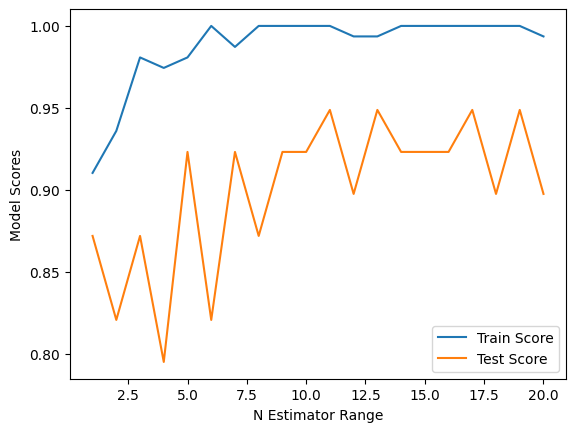

In [45]:
plt.plot(n_estimators_range, train_scores_rf, label="Train Score")
plt.plot(n_estimators_range, test_scores_rf, label="Test Score")
plt.xlabel("N Estimator Range")
plt.ylabel("Model Scores")
plt.legend()
plt.show();

### Hyperparameter training the RandomForest Model

In [46]:
# Creating a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [47]:
# Set up random seed
np.random.seed(42)

# set up Random Hyperparameter for the RandomForestClassifier

rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=50,
                            verbose=True)

In [48]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [49]:
rf_grid.score(x_test,y_test)

0.9487179487179487

In [50]:
rf_grid.score(x_train,y_train)

0.9871794871794872

In [51]:
rf_grid.best_params_

{'n_estimators': 560,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [52]:
# Creating a hyperparameter grid for RandomForestClassifier
rf_grid_1 = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
# Set up random seed
np.random.seed(42)

# set up Random Hyperparameter for the RandomForestClassifier

rf_grid_1 = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid_1,
                               cv=5,
                               n_iter=60,
                               verbose=True)

In [53]:
rf_grid_1.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=60,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [54]:
rf_grid_1.score(x_test,y_test)

0.9487179487179487

In [55]:
rf_grid_1.score(x_train, y_train)

0.9935897435897436

In [56]:
rf_grid = GridSearchCV(RandomForestClassifier(),
                      param_grid=rf_grid_1,
                      cv=5,
                      verbose=True)

In [57]:
rf_grid_1.best_score_

0.9034274193548388

In [58]:
rf_grid_1.best_params_

{'n_estimators': 560,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 10}

### Using Grid Search CV

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [60]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
}

In [61]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv=5,                # Number of cross-validation folds
                           verbose= 2,        # Verbosity level 
                           n_jobs=-1
)

In [62]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=260; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=510; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=560; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=660; total time=   1.3s
[CV] END

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=2)

In [63]:
grid_search.score(x_test,y_test)

0.9487179487179487

In [64]:
grid_search.score(x_train,y_train)

1.0

In [65]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 410}

In [66]:
grid_search.best_score_

0.9227822580645162

In [67]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=410)

In [68]:
import joblib

In [69]:
# Save the best model and grid search results
joblib.dump(grid_search.best_estimator_, 'best_model.joblib')
joblib.dump(grid_search, 'grid_search_results.joblib')

['grid_search_results.joblib']

In [70]:
# Load the saved Grid Search CV results and model
grid_search = joblib.load('grid_search_results.joblib')
best_model = joblib.load('best_model.joblib')

Using Bayesian Optimization

In [71]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.4 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=510; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=560; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=660; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=710; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=810; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=910; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=960; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=260; total time=   0.5s
[CV] END max_depth=10, min_sa

In [72]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter search space
param_space = {
    'n_estimators': (10, 500),
    'max_depth': (1, 50),
    'min_samples_split': (2, 20),
}

# Instantiate the classifier
rf = RandomForestClassifier(random_state=42)

# Perform Bayesian Optimization
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=30, cv=5)
bayes_search.fit(x_train, y_train)

# Best parameters found
print(bayes_search.best_params_)


OrderedDict({'max_depth': 42, 'min_samples_split': 4, 'n_estimators': 198})


In [73]:
bayes_search.best_score_

0.9227822580645162

In [74]:
bayes_search.best_estimator_

RandomForestClassifier(max_depth=42, min_samples_split=4, n_estimators=198,
                       random_state=42)

# Using Hyperopt

In [75]:
!pip install hyperopt


  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.1 MB/s eta 0:00:00a 0:00:01
Using cached future-1.0.0-py3-none-any.whl (491 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 4.8 MB/s eta 0:00:00a 0:00:01


In [76]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective(params):
    rf = RandomForestClassifier(**params, random_state=42)
    score = cross_val_score(rf, x_train, y_train, cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

# Define hyperparameter search space
param_space = {
    'n_estimators': hp.choice('n_estimators', range(10, 500)),
    'max_depth': hp.choice('max_depth', range(1, 50)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 20)),
}

# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=param_space, algo=tpe.suggest, max_evals=50, trials=trials)

print(best)

100%|████████| 50/50 [00:53<00:00,  1.06s/trial, best loss: -0.9227822580645162]
{'max_depth': 44, 'min_samples_split': 2, 'n_estimators': 190}


# Using Genetic Algorithm (TPOT)

In [77]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 7.3 MB/s eta 0:00:00
  Created wheel for deap: filename=deap-1.4.1-cp312-cp312-macosx_11_0_arm64.whl size=103924 sha256=1d286f62c60867032d96765fe4b2e805f90eae87e1fd722a467cdb8afd12907a
  Stored in directory: /Users/sohampingale/Library/Caches/pip/wheels/6c/1d/91/0a68add63bf57c3263b06b3462179d244fed0ff1dbb8d5eff0
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=8f33433bf07f93d8c8f60f3d28dcd5b3155da9d74e030f6ed0c3266bbb982f3f
  Stored in directory: /Users/sohampingale/Library/Caches/pip/wheels/10/10/63/c3c98c9859d2aa59553536cc2ea005d3c9c39e214ab4fd614c
Successfully built deap stopit


In [84]:
from tpot import TPOTClassifier

# Instantiate the TPOT classifier
tpot = TPOTClassifier(generations=5, population_size=20, cv=5, random_state=42, verbosity=2)

# Fit the model
tpot.fit(x_train, y_train)

# Display the optimized pipeline
print(tpot.fitted_pipeline_)


                                                                                
Generation 1 - Current best internal CV score: 0.9231854838709678
                                                                                
Generation 2 - Current best internal CV score: 0.9231854838709678
                                                                                
Generation 3 - Current best internal CV score: 0.9231854838709678
                                                                                
Generation 4 - Current best internal CV score: 0.929233870967742
                                                                                
Generation 5 - Current best internal CV score: 0.9548387096774194
                                                                                
Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=6, max_features=0.55, min_samples_leaf=10, min_samples_split=4, n_estimators=100, subsample=0.950000

# Using Optuna

In [85]:
!pip install optuna

In [86]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, predictions)  
    return accuracy

study = optuna.create_study(direction='maximize')

try:
    study.optimize(objective, n_trials=100)
except KeyboardInterrupt:
    print("Optimization interrupted.")


# Retrieve the best trial
best_trial = study.best_trial
print(f"Best trial value: {best_trial.value}")
print(f"Best hyperparameters: {best_trial.params}")


[I 2024-10-27 09:19:56,029] A new study created in memory with name: no-name-bc824ef0-f415-4347-9de3-e259b7263c4f
[I 2024-10-27 09:19:56,377] Trial 0 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 458, 'max_depth': 4, 'min_samples_split': 13}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 09:19:56,584] Trial 1 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 272, 'max_depth': 21, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 09:19:56,760] Trial 2 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 230, 'max_depth': 25, 'min_samples_split': 11}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 09:19:57,251] Trial 3 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 673, 'max_depth': 30, 'min_samples_split': 19}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 09:19:57,605] Trial 4 finished with value: 0.948717948

Best trial value: 0.9487179487179487
Best hyperparameters: {'n_estimators': 458, 'max_depth': 4, 'min_samples_split': 13}


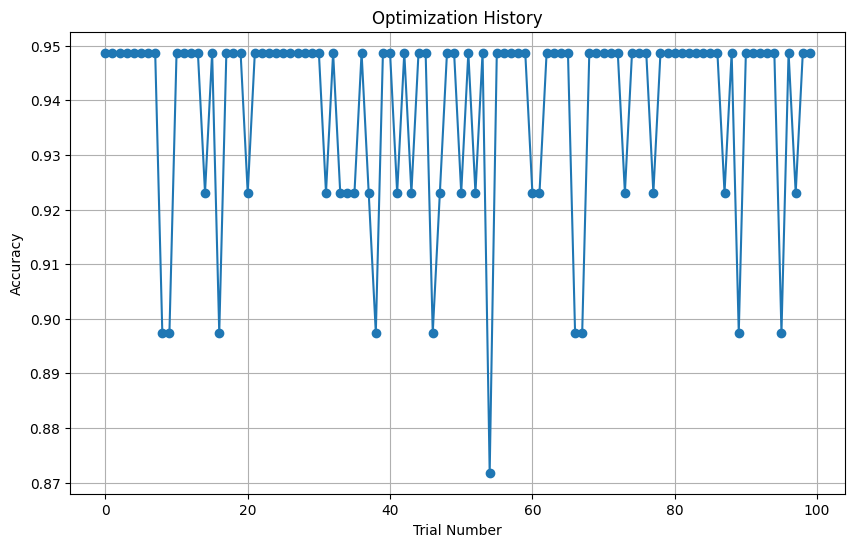

In [87]:
import matplotlib.pyplot as plt

# Get the trial numbers and values (accuracy in your case)
trial_numbers = [t.number for t in study.trials if t.value is not None]
trial_values = [t.value for t in study.trials if t.value is not None]

# Plot optimization history
plt.figure(figsize=(10, 6))
plt.plot(trial_numbers, trial_values, marker="o", linestyle="-")
plt.title("Optimization History")
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [112]:
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train-Test Split (assuming x and y are defined)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Objective function for Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"Precision: {precision_score(y_test, predictions, average='weighted')}")
    print(f"Recall: {recall_score(y_test, predictions, average='weighted')}")
    print(f"F1 Score: {f1_score(y_test, predictions, average='weighted')}")
    return accuracy

# Create and run the study
study = optuna.create_study(direction='maximize')
try:
    study.optimize(objective, n_trials=100)
except KeyboardInterrupt:
    print("Optimization interrupted.")

# Save the best model
best_params = study.best_trial.params
best_model = RandomForestClassifier(**best_params)
best_model.fit(x_train, y_train)

with open("best_random_forest_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("Model saved as 'best_random_forest_model.pkl'.")

# Load the model and make predictions
with open("best_random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Example predictions
new_predictions = loaded_model.predict(x_test)
print("Loaded model accuracy:", accuracy_score(y_test, new_predictions))

[I 2024-10-27 10:52:58,258] A new study created in memory with name: no-name-2b85db75-bf62-48f7-8b53-a727ce6afec8
[I 2024-10-27 10:52:58,533] Trial 0 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 337, 'max_depth': 26, 'min_samples_split': 8}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:52:58,652] Trial 1 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 153, 'max_depth': 20, 'min_samples_split': 10}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454
Precision: 0.9203574203574204
Recall: 0.9230769230769231
F1 Score: 0.9207100591715977


[I 2024-10-27 10:52:59,547] Trial 2 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 985, 'max_depth': 17, 'min_samples_split': 5}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:00,202] Trial 3 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 828, 'max_depth': 20, 'min_samples_split': 7}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:00,855] Trial 4 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 804, 'max_depth': 15, 'min_samples_split': 4}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:01,388] Trial 5 finished with value: 0.8974358974358975 and parameters: {'n_estimators': 759, 'max_depth': 2, 'min_samples_split': 13}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:53:01,471] Trial 6 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 104, 'max_depth': 31, 'min_samples_split': 15}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9088319088319088
Recall: 0.8974358974358975
F1 Score: 0.8799396681749624
Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:01,829] Trial 7 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 481, 'max_depth': 6, 'min_samples_split': 10}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9203574203574204
Recall: 0.9230769230769231
F1 Score: 0.9207100591715977


[I 2024-10-27 10:53:02,482] Trial 8 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 859, 'max_depth': 23, 'min_samples_split': 8}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:03,151] Trial 9 finished with value: 0.8974358974358975 and parameters: {'n_estimators': 918, 'max_depth': 2, 'min_samples_split': 3}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9088319088319088
Recall: 0.8974358974358975
F1 Score: 0.8799396681749624


[I 2024-10-27 10:53:03,426] Trial 10 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 355, 'max_depth': 32, 'min_samples_split': 19}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:03,886] Trial 11 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 593, 'max_depth': 12, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:04,136] Trial 12 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 313, 'max_depth': 25, 'min_samples_split': 2}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:04,622] Trial 13 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 637, 'max_depth': 27, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:04,936] Trial 14 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 409, 'max_depth': 11, 'min_samples_split': 12}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:05,686] Trial 15 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 982, 'max_depth': 18, 'min_samples_split': 5}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:05,909] Trial 16 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 283, 'max_depth': 28, 'min_samples_split': 9}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:06,433] Trial 17 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 694, 'max_depth': 14, 'min_samples_split': 15}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:06,802] Trial 18 finished with value: 0.8974358974358975 and parameters: {'n_estimators': 490, 'max_depth': 22, 'min_samples_split': 20}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:53:06,978] Trial 19 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 218, 'max_depth': 10, 'min_samples_split': 8}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9088319088319088
Recall: 0.8974358974358975
F1 Score: 0.8799396681749624
Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:07,373] Trial 20 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 506, 'max_depth': 28, 'min_samples_split': 2}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:08,109] Trial 21 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 964, 'max_depth': 18, 'min_samples_split': 7}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:08,779] Trial 22 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 876, 'max_depth': 21, 'min_samples_split': 5}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:09,396] Trial 23 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 810, 'max_depth': 25, 'min_samples_split': 8}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:09,931] Trial 24 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 693, 'max_depth': 19, 'min_samples_split': 4}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:10,678] Trial 25 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 984, 'max_depth': 16, 'min_samples_split': 11}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:11,367] Trial 26 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 900, 'max_depth': 24, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:11,689] Trial 27 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 412, 'max_depth': 7, 'min_samples_split': 7}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:12,271] Trial 28 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 759, 'max_depth': 30, 'min_samples_split': 4}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:53:12,459] Trial 29 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 233, 'max_depth': 20, 'min_samples_split': 9}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454
Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:12,892] Trial 30 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 563, 'max_depth': 13, 'min_samples_split': 10}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:13,466] Trial 31 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 747, 'max_depth': 16, 'min_samples_split': 4}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:14,093] Trial 32 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 819, 'max_depth': 14, 'min_samples_split': 5}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:14,726] Trial 33 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 804, 'max_depth': 16, 'min_samples_split': 3}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:15,432] Trial 34 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 924, 'max_depth': 20, 'min_samples_split': 7}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:15,931] Trial 35 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 646, 'max_depth': 22, 'min_samples_split': 10}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:16,572] Trial 36 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 850, 'max_depth': 18, 'min_samples_split': 13}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:17,282] Trial 37 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 933, 'max_depth': 7, 'min_samples_split': 9}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:53:17,386] Trial 38 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 118, 'max_depth': 15, 'min_samples_split': 3}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454
Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:17,939] Trial 39 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 715, 'max_depth': 23, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:18,272] Trial 40 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 428, 'max_depth': 9, 'min_samples_split': 8}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:53:18,429] Trial 41 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 193, 'max_depth': 30, 'min_samples_split': 14}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9203574203574204
Recall: 0.9230769230769231
F1 Score: 0.9207100591715977
Precision: 0.9203574203574204
Recall: 0.9230769230769231
F1 Score: 0.9207100591715977


[I 2024-10-27 10:53:18,532] Trial 42 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 117, 'max_depth': 31, 'min_samples_split': 16}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9296703296703296
Recall: 0.9230769230769231
F1 Score: 0.9143095710259889


[I 2024-10-27 10:53:18,804] Trial 43 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 346, 'max_depth': 32, 'min_samples_split': 16}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:19,029] Trial 44 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 284, 'max_depth': 28, 'min_samples_split': 17}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:19,499] Trial 45 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 614, 'max_depth': 27, 'min_samples_split': 11}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:53:19,614] Trial 46 finished with value: 0.8974358974358975 and parameters: {'n_estimators': 151, 'max_depth': 1, 'min_samples_split': 12}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454
Precision: 0.9088319088319088
Recall: 0.8974358974358975
F1 Score: 0.8799396681749624


[I 2024-10-27 10:53:20,031] Trial 47 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 533, 'max_depth': 26, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:20,313] Trial 48 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 360, 'max_depth': 29, 'min_samples_split': 18}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9296703296703296
Recall: 0.9230769230769231
F1 Score: 0.9143095710259889


[I 2024-10-27 10:53:20,997] Trial 49 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 879, 'max_depth': 18, 'min_samples_split': 5}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:21,363] Trial 50 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 463, 'max_depth': 12, 'min_samples_split': 3}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9203574203574204
Recall: 0.9230769230769231
F1 Score: 0.9207100591715977


[I 2024-10-27 10:53:22,096] Trial 51 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 950, 'max_depth': 24, 'min_samples_split': 7}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:22,751] Trial 52 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 852, 'max_depth': 21, 'min_samples_split': 8}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9203574203574204
Recall: 0.9230769230769231
F1 Score: 0.9207100591715977


[I 2024-10-27 10:53:23,346] Trial 53 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 776, 'max_depth': 22, 'min_samples_split': 9}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:24,096] Trial 54 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 989, 'max_depth': 26, 'min_samples_split': 11}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:24,796] Trial 55 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 911, 'max_depth': 19, 'min_samples_split': 2}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:25,448] Trial 56 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 851, 'max_depth': 17, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:25,968] Trial 57 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 667, 'max_depth': 24, 'min_samples_split': 4}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:26,514] Trial 58 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 724, 'max_depth': 21, 'min_samples_split': 20}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9296703296703296
Recall: 0.9230769230769231
F1 Score: 0.9143095710259889


[I 2024-10-27 10:53:27,121] Trial 59 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 791, 'max_depth': 14, 'min_samples_split': 8}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:27,339] Trial 60 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 267, 'max_depth': 25, 'min_samples_split': 5}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:53:27,496] Trial 61 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 192, 'max_depth': 32, 'min_samples_split': 18}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454
Precision: 0.9296703296703296
Recall: 0.9230769230769231
F1 Score: 0.9143095710259889


[I 2024-10-27 10:53:27,757] Trial 62 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 331, 'max_depth': 30, 'min_samples_split': 19}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9296703296703296
Recall: 0.9230769230769231
F1 Score: 0.9143095710259889


[I 2024-10-27 10:53:28,199] Trial 63 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 576, 'max_depth': 31, 'min_samples_split': 14}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:28,509] Trial 64 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 390, 'max_depth': 19, 'min_samples_split': 7}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:29,176] Trial 65 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 887, 'max_depth': 29, 'min_samples_split': 19}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9296703296703296
Recall: 0.9230769230769231
F1 Score: 0.9143095710259889


[I 2024-10-27 10:53:29,816] Trial 66 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 828, 'max_depth': 27, 'min_samples_split': 5}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:30,182] Trial 67 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 469, 'max_depth': 17, 'min_samples_split': 12}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:30,913] Trial 68 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 947, 'max_depth': 23, 'min_samples_split': 4}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:31,674] Trial 69 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 1000, 'max_depth': 31, 'min_samples_split': 9}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:53:31,861] Trial 70 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 228, 'max_depth': 15, 'min_samples_split': 15}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454
Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:32,330] Trial 71 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 599, 'max_depth': 11, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:32,897] Trial 72 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 743, 'max_depth': 4, 'min_samples_split': 7}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:33,319] Trial 73 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 540, 'max_depth': 13, 'min_samples_split': 10}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:33,853] Trial 74 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 685, 'max_depth': 9, 'min_samples_split': 4}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:34,199] Trial 75 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 436, 'max_depth': 15, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:34,502] Trial 76 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 375, 'max_depth': 20, 'min_samples_split': 3}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:34,894] Trial 77 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 496, 'max_depth': 12, 'min_samples_split': 8}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:35,142] Trial 78 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 302, 'max_depth': 29, 'min_samples_split': 5}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:53:35,273] Trial 79 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 150, 'max_depth': 32, 'min_samples_split': 8}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454
Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:35,370] Trial 80 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 102, 'max_depth': 22, 'min_samples_split': 7}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:35,597] Trial 81 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 274, 'max_depth': 25, 'min_samples_split': 2}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:35,804] Trial 82 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 245, 'max_depth': 23, 'min_samples_split': 2}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:36,075] Trial 83 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 333, 'max_depth': 26, 'min_samples_split': 5}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-10-27 10:53:36,239] Trial 84 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 191, 'max_depth': 27, 'min_samples_split': 3}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454
Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:36,651] Trial 85 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 520, 'max_depth': 13, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:36,900] Trial 86 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 303, 'max_depth': 28, 'min_samples_split': 9}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:37,536] Trial 87 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 835, 'max_depth': 18, 'min_samples_split': 16}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:38,146] Trial 88 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 781, 'max_depth': 16, 'min_samples_split': 4}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:38,878] Trial 89 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 971, 'max_depth': 25, 'min_samples_split': 17}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:39,585] Trial 90 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 909, 'max_depth': 21, 'min_samples_split': 3}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:40,086] Trial 91 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 640, 'max_depth': 24, 'min_samples_split': 7}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:40,541] Trial 92 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 578, 'max_depth': 26, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:41,029] Trial 93 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 622, 'max_depth': 30, 'min_samples_split': 5}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:41,711] Trial 94 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 865, 'max_depth': 20, 'min_samples_split': 10}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:42,271] Trial 95 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 717, 'max_depth': 27, 'min_samples_split': 6}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:42,889] Trial 96 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 806, 'max_depth': 29, 'min_samples_split': 13}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:43,219] Trial 97 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 410, 'max_depth': 23, 'min_samples_split': 7}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:43,579] Trial 98 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 448, 'max_depth': 17, 'min_samples_split': 4}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.951734539969834
Recall: 0.9487179487179487
F1 Score: 0.9452214452214454


[I 2024-10-27 10:53:44,156] Trial 99 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 758, 'max_depth': 31, 'min_samples_split': 20}. Best is trial 0 with value: 0.9487179487179487.


Precision: 0.9296703296703296
Recall: 0.9230769230769231
F1 Score: 0.9143095710259889
Model saved as 'best_random_forest_model.pkl'.
Loaded model accuracy: 0.9487179487179487


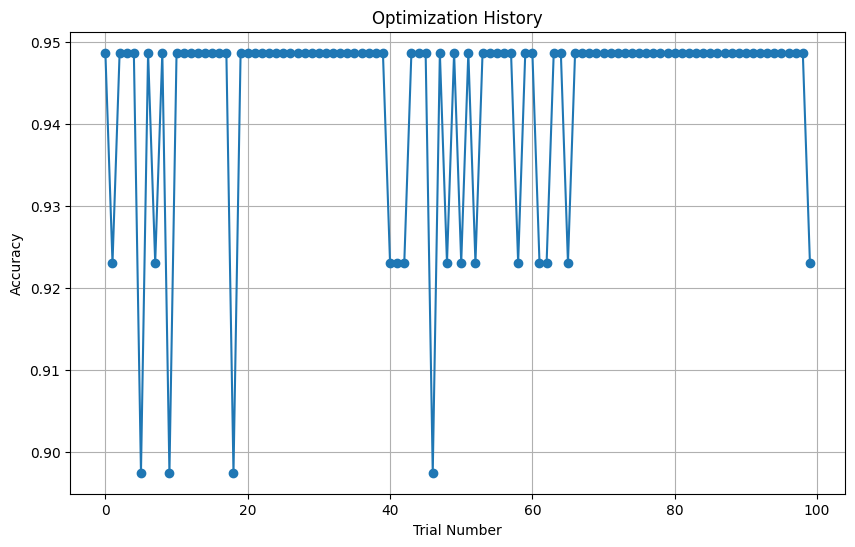

In [113]:
import matplotlib.pyplot as plt

# Get the trial numbers and values (accuracy in your case)
trial_numbers = [t.number for t in study.trials if t.value is not None]
trial_values = [t.value for t in study.trials if t.value is not None]

# Plot optimization history
plt.figure(figsize=(10, 6))
plt.plot(trial_numbers, trial_values, marker="o", linestyle="-")
plt.title("Optimization History")
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [115]:
best_params = study.best_trial.params
best_model = RandomForestClassifier(**best_params)
best_model.fit(x_train, y_train)

with open("best_random_forest_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("Model saved as 'best_random_forest_model.pkl'.")

Model saved as 'best_random_forest_model.pkl'.


In [116]:
with open("best_random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("Model Loaded successfully")

Model Loaded successfully


In [117]:
new_predictions = loaded_model.predict(x_test)
print("Loaded model accuracy:", accuracy_score(y_test, new_predictions))

Loaded model accuracy: 0.9487179487179487


In [118]:
new_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1.])